In [342]:
import findspark
findspark.init()

In [343]:
import pyspark
from pyspark.context import SparkContext
from pyspark.sql import SparkSession 
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()
print(sc.version)
print(spark.version)

2.4.8
2.4.8


In [344]:
spark = SparkSession \
    .builder \
    .appName("MongoDBIntegration") \
    .config("spark.mongodb.input.uri", "mongodb://localhost:27018/sampleDatasets.train") \
    .config("spark.mongodb.output.uri", "mongodb://localhost:27018/sampleDatasets.train") \
    .getOrCreate()
Loan_dataFrame = spark.read.format("mongo").load()
Loan_dataFrame.printSchema()


root
 |-- Accounts Delinquent: integer (nullable = true)
 |-- Application Type: string (nullable = true)
 |-- Batch Enrolled: string (nullable = true)
 |-- Collection 12 months Medical: integer (nullable = true)
 |-- Collection Recovery Fee: double (nullable = true)
 |-- Debit to Income: double (nullable = true)
 |-- Delinquency - two years: integer (nullable = true)
 |-- Employment Duration: string (nullable = true)
 |-- Funded Amount: integer (nullable = true)
 |-- Funded Amount Investor: decimal(18,13) (nullable = true)
 |-- Grade: string (nullable = true)
 |-- Home Ownership: decimal(18,12) (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Initial List Status: string (nullable = true)
 |-- Inquires - six months: integer (nullable = true)
 |-- Interest Rate: double (nullable = true)
 |-- Last week Pay: integer (nullable = true)
 |-- Loan Amount: integer (nullable = true)
 |-- Loan Status: integer (nullable = true)
 |-- Loan Title: string (nullable = true)
 |-- Open Account: 

In [345]:
loan_df=Loan_dataFrame
# loan_df = loan_df.na.drop()
columns_to_rename = {
    "Loan Amount": "Loan_Amount",
    "Funded Amount": "Funded_Amoun",                                             
    "Funded Amount Investor":"Funded_Amount_Investor",                                      
    "Batch Enrolled":"Batch_Enrolled"                 , 
    "Interest Rate":"Interest_Rate"                    ,                         
    "Sub Grade":"Sub_Grade"                       ,
    "Employment Duration":"Employment_Duration"    ,         
    "Home Ownership":"Home_Ownership"               , 
    "Verification Status":"Verification_Status"      ,       
    "Payment Plan":"Payment_Plan"                    ,
    "Loan Title":"Loan_Title"                    ,
    "Debit to Income":"Debit_to_Income"           ,     
    "Delinquency - two years":"Delinquency_2_years",         
    "Inquires - six months":"Inquires_6_months"     ,      
    "Open Account":"Open_Account"                    ,
    "Public Record" :"Public_Record"                  ,
    "Revolving Balance":"Revolving_Balance"             ,  
    "Revolving Utilities":"Revolving_Utilities"          ,   
    "Total Accounts" :"Total_Accounts"                 ,
    "Initial List Status":"Initial_List_Status"         ,    
    "Initial List Status":"Initial_List_Status"         ,
    "Total Received Late Fee":"Total_Received_Late_Fee"  ,                   
    "Collection Recovery Fee" :"Collection_Recovery_Fee"  ,      
    "Collection 12 months Medical " :"Collection_12_months_Medical "  ,
    "Application Type" :"Application_Type"               ,
    "Last week Pay":"Last_week_Pay"                   ,
    "Accounts Delinquent": "Accounts_Delinquent"    ,
    "Total Collection Amount":"Total_Collection_Amount"   ,     
    "Total Current Balance":"Total_Current_Balance"    ,       
    "Total Revolving Credit Limit":"Total_Revolving_Credit_Limit",
    "Loan Status":"Loan_Status",
    "Collection 12 months Medical":"Collection_12_months_Medical",
    "Total Received Interest":"Total_Received_Interest"
    # Add more columns here if needed
}

# Rename the columns
for old_name, new_name in columns_to_rename.items():
    loan_df = loan_df.withColumnRenamed(old_name, new_name)

loan_df.printSchema()

root
 |-- Accounts_Delinquent: integer (nullable = true)
 |-- Application_Type: string (nullable = true)
 |-- Batch_Enrolled: string (nullable = true)
 |-- Collection_12_months_Medical: integer (nullable = true)
 |-- Collection_Recovery_Fee: double (nullable = true)
 |-- Debit_to_Income: double (nullable = true)
 |-- Delinquency_2_years: integer (nullable = true)
 |-- Employment_Duration: string (nullable = true)
 |-- Funded_Amoun: integer (nullable = true)
 |-- Funded_Amount_Investor: decimal(18,13) (nullable = true)
 |-- Grade: string (nullable = true)
 |-- Home_Ownership: decimal(18,12) (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Initial_List_Status: string (nullable = true)
 |-- Inquires_6_months: integer (nullable = true)
 |-- Interest_Rate: double (nullable = true)
 |-- Last_week_Pay: integer (nullable = true)
 |-- Loan_Amount: integer (nullable = true)
 |-- Loan_Status: integer (nullable = true)
 |-- Loan_Title: string (nullable = true)
 |-- Open_Account: integer (

In [346]:
#transform data to parquet.
loan_df.write.mode('overwrite').parquet('C:/Users/sthotir/Documents/ECE552_Final_Project/train.parquet')
loan_df = spark.read.parquet('C:/Users/sthotir/Documents/ECE552_Final_Project/train.parquet')
loan_df.printSchema()

root
 |-- Accounts_Delinquent: integer (nullable = true)
 |-- Application_Type: string (nullable = true)
 |-- Batch_Enrolled: string (nullable = true)
 |-- Collection_12_months_Medical: integer (nullable = true)
 |-- Collection_Recovery_Fee: double (nullable = true)
 |-- Debit_to_Income: double (nullable = true)
 |-- Delinquency_2_years: integer (nullable = true)
 |-- Employment_Duration: string (nullable = true)
 |-- Funded_Amoun: integer (nullable = true)
 |-- Funded_Amount_Investor: decimal(18,13) (nullable = true)
 |-- Grade: string (nullable = true)
 |-- Home_Ownership: decimal(18,12) (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Initial_List_Status: string (nullable = true)
 |-- Inquires_6_months: integer (nullable = true)
 |-- Interest_Rate: double (nullable = true)
 |-- Last_week_Pay: integer (nullable = true)
 |-- Loan_Amount: integer (nullable = true)
 |-- Loan_Status: integer (nullable = true)
 |-- Loan_Title: string (nullable = true)
 |-- Open_Account: integer (

In [347]:
# Account Delinquent and Payment plan has only one value which is irrelavent hence drop it
loan_df= loan_df.drop('Accounts_Delinquent', 'Payment_Plan')

from pyspark.sql.functions import col
# creating debt-to-income ratio column
loan_df = loan_df.withColumn('Debt_to_Income_Ratio', col('Debit_to_Income') / col('Loan_Amount'))
# creating Credit Utilization Ratio column
loan_df  = loan_df.withColumn('Credit_Utilization_Ratio', col('Revolving_Balance') / col('Total_Revolving_Credit_Limit'))

from pyspark.sql.functions import lit
current_year = 2023  # Replace with the current year
loan_df = loan_df.withColumn('Time_Since_Last_Delinquency', lit(current_year) - col('Delinquency_2_years'))

loan_df.printSchema()


root
 |-- Application_Type: string (nullable = true)
 |-- Batch_Enrolled: string (nullable = true)
 |-- Collection_12_months_Medical: integer (nullable = true)
 |-- Collection_Recovery_Fee: double (nullable = true)
 |-- Debit_to_Income: double (nullable = true)
 |-- Delinquency_2_years: integer (nullable = true)
 |-- Employment_Duration: string (nullable = true)
 |-- Funded_Amoun: integer (nullable = true)
 |-- Funded_Amount_Investor: decimal(18,13) (nullable = true)
 |-- Grade: string (nullable = true)
 |-- Home_Ownership: decimal(18,12) (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Initial_List_Status: string (nullable = true)
 |-- Inquires_6_months: integer (nullable = true)
 |-- Interest_Rate: double (nullable = true)
 |-- Last_week_Pay: integer (nullable = true)
 |-- Loan_Amount: integer (nullable = true)
 |-- Loan_Status: integer (nullable = true)
 |-- Loan_Title: string (nullable = true)
 |-- Open_Account: integer (nullable = true)
 |-- Public_Record: integer (nullab

In [348]:
from pyspark.sql.types import StringType, IntegerType, DoubleType, FloatType

schema = loan_df.schema

# Categorical columns have data type string
cate = [field.name for field in schema.fields if field.dataType == StringType()]

# # Numerical columns are typically of types IntegerType, DoubleType, etc.
num = [field.name for field in schema.fields if isinstance(field.dataType, (IntegerType, DoubleType, FloatType))]


In [349]:
value_counts = loan_df.groupBy('Loan_Status').count()

# Calculate the total number of records
total = loan_df.count()

# Calculate percentages
value_counts = value_counts.withColumn('Percentage', (col('count') / lit(total) * 100))

# Show the value counts with percentages
value_counts.show()

# If you want to print the percentages for specific values, such as 0 and 1:
for status in [0, 1]:
    percentage = value_counts.filter(col('Loan_Status') == status).select('Percentage').collect()[0][0]
    print(f"{percentage}% of values are {status}")

+-----------+-----+-----------------+
|Loan_Status|count|       Percentage|
+-----------+-----+-----------------+
|          1| 6241|9.250996842713784|
|          0|61222|90.74900315728621|
+-----------+-----+-----------------+

90.74900315728621% of values are 0
9.250996842713784% of values are 1


In [350]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

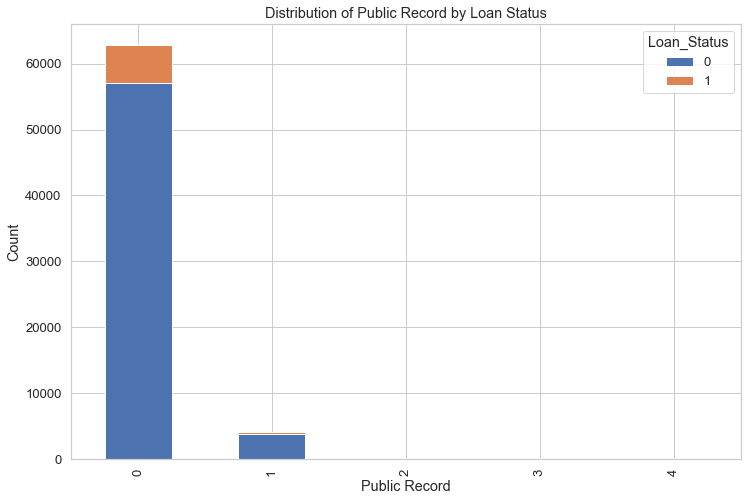

In [351]:


# Assuming loan_df is your PySpark DataFrame

# Aggregate the data
aggregated_data = loan_df.groupBy("Public_Record", "Loan_Status").count()

# Convert to Pandas DataFrame for plotting
public_record_pdf = aggregated_data.toPandas()

# Use matplotlib for plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Create a bar plot
# The color will be default set by matplotlib
public_record_pdf.pivot(index="Public_Record", columns="Loan_Status", values="count").plot(kind='bar', stacked=True, ax=ax)

# Add a title and axis labels
plt.title("Distribution of Public Record by Loan Status")
plt.xlabel("Public Record")
plt.ylabel("Count")

# Show the plot
plt.show()


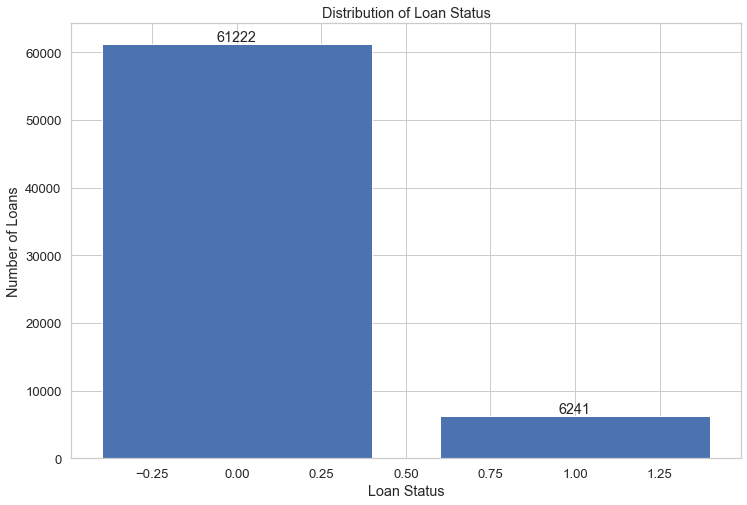

In [352]:


# Assuming loan_df is your PySpark DataFrame

# Aggregate data in PySpark to get the count of 'Loan Status'
loan_status_counts = loan_df.groupBy('Loan_Status').count().toPandas()

# Now plot using Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
bars = plt.bar(loan_status_counts['Loan_Status'], loan_status_counts['count'])

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), ha='center', va='bottom')

# Set the titles and labels
plt.title('Distribution of Loan Status')
plt.ylabel('Number of Loans')
plt.xlabel('Loan Status')
plt.xticks(rotation=0)

# Show the plot
plt.show()







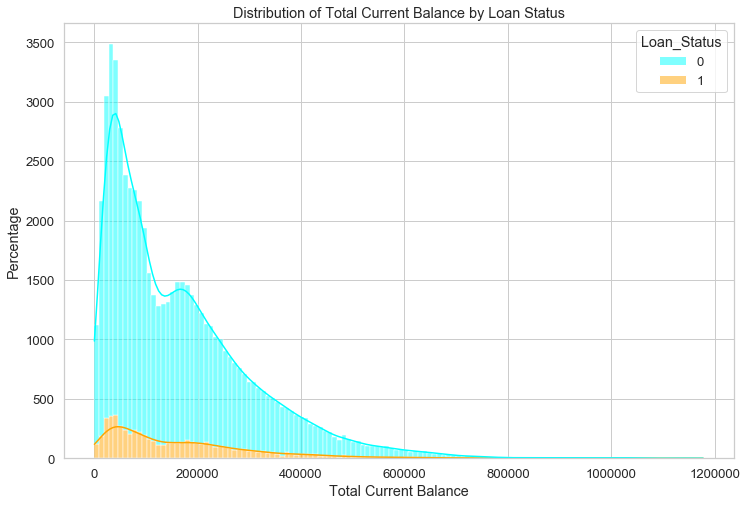

In [353]:
# Aggregate data in PySpark
# Assuming 'train' is a PySpark DataFrame and has been processed appropriately
# You might need to perform some aggregation or sampling depending on the size of the data
balance_status_df = loan_df.groupBy("Total_Current_Balance", "Loan_Status").count().toPandas()
# Now use seaborn and matplotlib for plotting
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data=balance_status_df, x="Total_Current_Balance", hue="Loan_Status", multiple="stack", kde=True,palette=['cyan', 'orange'])

# Add a title and axis labels
plt.title("Distribution of Total Current Balance by Loan Status")
plt.xlabel("Total Current Balance")
plt.ylabel("Percentage")

plt.show()

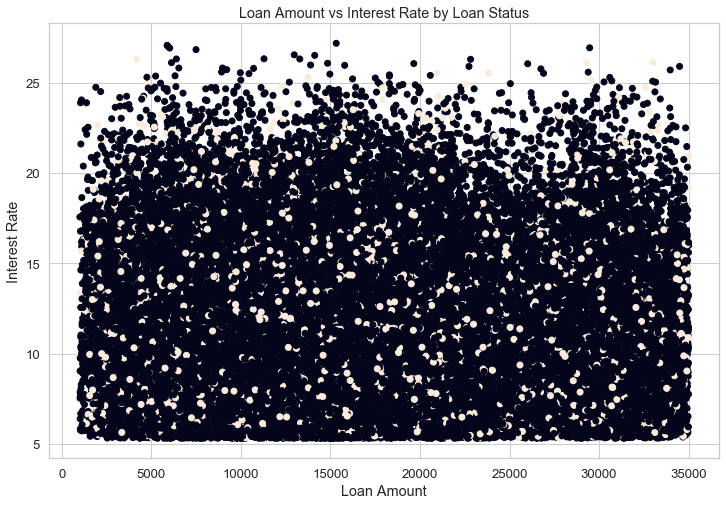

In [354]:
train_agg = loan_df.groupBy(["Loan_Amount", "Interest_Rate", "Loan_Status"]).count()

# Collect the data into a Pandas DataFrame
# Be careful with memory usage if you have a large dataset
pandas_df = train_agg.toPandas()
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 8))
plt.scatter(x=pandas_df["Loan_Amount"], y=pandas_df["Interest_Rate"], c=pandas_df["Loan_Status"])

plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate")
plt.title("Loan Amount vs Interest Rate by Loan Status")
plt.show()

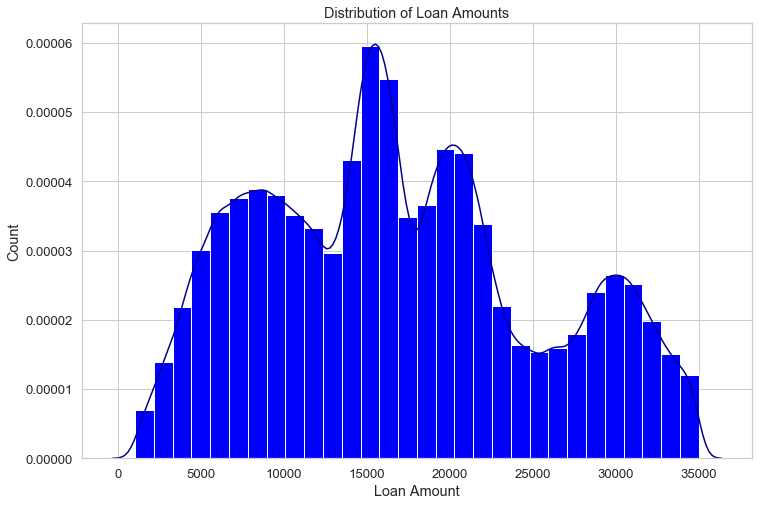

In [355]:
loan_amounts = loan_df.select('Loan_Amount').toPandas()

# Plotting using Matplotlib
plt.figure(figsize=(12, 8))
plt.hist(loan_amounts['Loan_Amount'], bins=30, color='blue', density=True)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts')
plt.grid(True)

# KDE plot
sns.kdeplot(loan_amounts['Loan_Amount'], bw_adjust=0.5, ax=plt.gca(), color='darkblue')

plt.show()

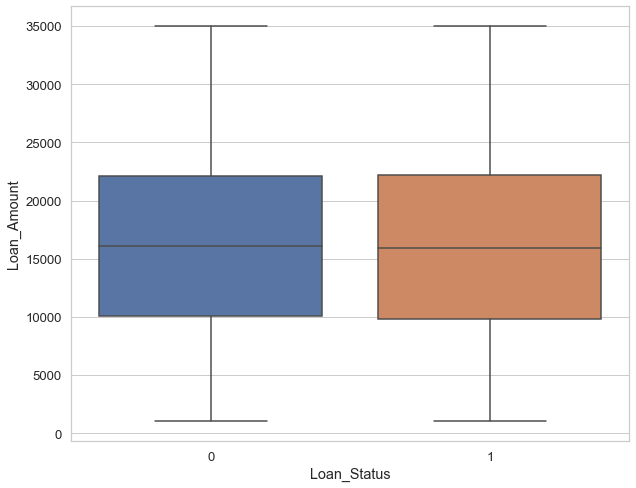

In [356]:
loan_status_pdf = loan_df.select('Loan_Status', 'Loan_Amount').toPandas()

# Now create the plot using seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(x='Loan_Status', y='Loan_Amount', data=loan_status_pdf)
plt.show()

In [357]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml import Pipeline

# Assuming 'train' is your PySpark DataFrame and 'cate' contains the categorical column names
indexers = [
    StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))
    for c in cate
]

# We create a separate OneHotEncoder for each categorical column
encoders = [
    OneHotEncoder(
        inputCol=indexer.getOutputCol(),
        outputCol="{0}_encoded".format(indexer.getOutputCol())
    )
    for indexer in indexers
]

# The pipeline will execute indexers and then encoders
pipeline = Pipeline(stages=indexers + encoders)

# Fit and transform the data
model = pipeline.fit(loan_df)
loan_df = model.transform(loan_df)


# Drop the intermediate 'indexed' columns and keep the 'encoded' columns
for indexer in indexers:
    loan_df = loan_df.drop(indexer.getOutputCol())

# Show the shape of the DataFrame
print(loan_df.count(), len(loan_df.columns))


67463 45


In [358]:
loan_df.printSchema()

root
 |-- Application_Type: string (nullable = true)
 |-- Batch_Enrolled: string (nullable = true)
 |-- Collection_12_months_Medical: integer (nullable = true)
 |-- Collection_Recovery_Fee: double (nullable = true)
 |-- Debit_to_Income: double (nullable = true)
 |-- Delinquency_2_years: integer (nullable = true)
 |-- Employment_Duration: string (nullable = true)
 |-- Funded_Amoun: integer (nullable = true)
 |-- Funded_Amount_Investor: decimal(18,13) (nullable = true)
 |-- Grade: string (nullable = true)
 |-- Home_Ownership: decimal(18,12) (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Initial_List_Status: string (nullable = true)
 |-- Inquires_6_months: integer (nullable = true)
 |-- Interest_Rate: double (nullable = true)
 |-- Last_week_Pay: integer (nullable = true)
 |-- Loan_Amount: integer (nullable = true)
 |-- Loan_Status: integer (nullable = true)
 |-- Loan_Title: string (nullable = true)
 |-- Open_Account: integer (nullable = true)
 |-- Public_Record: integer (nullab

In [359]:

from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.sql.functions import when, lit
from pyspark.ml import Pipeline


loan_df=loan_df.withColumn("Employment_Duration_Index",\
                                when((loan_df.Employment_Duration == 'MORTGAGE'),lit(0))\
                                .when((loan_df.Employment_Duration == 'RENT'),lit(1))\
                                .when((loan_df.Employment_Duration == 'OWN'),lit(2)))
loan_df=loan_df.withColumn("Verification_Status_Index",\
                                when((loan_df.Verification_Status == 'Not Verified'),lit(0))\
                                .when((loan_df.Verification_Status == 'Verified'),lit(1))\
                                .when((loan_df.Verification_Status == 'Source Verified'),lit(2)))
loan_df=loan_df.withColumn("Initial_List_Status_Index",\
                                when((loan_df.Initial_List_Status == 'w'),lit(0))\
                                .when((loan_df.Initial_List_Status == 'f'),lit(1)))
                                
loan_df=loan_df.withColumn("Application_Type_Index",\
                                when((loan_df.Application_Type == 'INDIVIDUAL'),lit(0))\
                                .when((loan_df.Application_Type == 'JOINT'),lit(1)))
     

In [360]:
drop_columns=['Loan_Title','Batch_Enrolled','Application_Type','Employment_Duration','Grade','Initial_List_Status','Sub_Grade',
             'Verification_Status','oid','_id']
loan_df=loan_df.drop(*drop_columns)
loan_df.printSchema()

root
 |-- Collection_12_months_Medical: integer (nullable = true)
 |-- Collection_Recovery_Fee: double (nullable = true)
 |-- Debit_to_Income: double (nullable = true)
 |-- Delinquency_2_years: integer (nullable = true)
 |-- Funded_Amoun: integer (nullable = true)
 |-- Funded_Amount_Investor: decimal(18,13) (nullable = true)
 |-- Home_Ownership: decimal(18,12) (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Inquires_6_months: integer (nullable = true)
 |-- Interest_Rate: double (nullable = true)
 |-- Last_week_Pay: integer (nullable = true)
 |-- Loan_Amount: integer (nullable = true)
 |-- Loan_Status: integer (nullable = true)
 |-- Open_Account: integer (nullable = true)
 |-- Public_Record: integer (nullable = true)
 |-- Recoveries: double (nullable = true)
 |-- Revolving_Balance: integer (nullable = true)
 |-- Revolving_Utilities: decimal(19,17) (nullable = true)
 |-- Term: integer (nullable = true)
 |-- Total_Accounts: integer (nullable = true)
 |-- Total_Collection_Amount:

In [361]:
assembler = VectorAssembler(inputCols=['Employment_Duration_Index','Verification_Status_Index','Application_Type_Index',
                                       'Initial_List_Status_Index','Collection_12_months_Medical', 'Collection_Recovery_Fee', 
                                       'Debit_to_Income', 'Delinquency_2_years', 'Funded_Amoun', 'ID', 'Inquires_6_months',
                                       'Interest_Rate', 'Last_week_Pay', 'Loan_Amount', 'Open_Account', 'Public_Record',
                                       'Recoveries', 'Revolving_Balance', 'Term', 'Total_Accounts', 'Total_Collection_Amount', 
                                       'Total_Current_Balance', 'Total_Received_Interest', 'Total_Revolving_Credit_Limit', 
                                       'Debt_to_Income_Ratio', 'Credit_Utilization_Ratio', 'Time_Since_Last_Delinquency'],
                            outputCol='features')


In [362]:
loan_df_transformed = assembler.transform(loan_df).select('features','Loan_Status')



In [363]:
train_data, test_data = loan_df_transformed.randomSplit([0.7, 0.3], seed=70)



In [364]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
lr = LogisticRegression(featuresCol='features',labelCol='Loan_Status',predictionCol='prediction')



In [365]:
lr_model = lr.fit(train_data)

In [366]:
# sorted_data=lr_model.summary.predictions.describe()  # Shows 50 rows without truncating the content


In [367]:
# Evaluate the model on the test data
train_test_data = lr_model.evaluate(test_data)

# Get the predictions DataFrame
predictions_df = train_test_data.predictions




In [375]:

evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='Loan_Status')  # Replace 'Loan_Status' with your actual target column name
Accuracy = evaluator.evaluate(predictions_df)
print("Accuracy: ", Accuracy)


Accuracy:  0.5


In [369]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create evaluators
evaluatorrecall = MulticlassClassificationEvaluator(labelCol="Loan_Status", predictionCol="prediction", metricName="weightedRecall")
evaluatorPrecision = MulticlassClassificationEvaluator(labelCol="Loan_Status", predictionCol="prediction", metricName="weightedPrecision")
evaluatorF1 = MulticlassClassificationEvaluator(labelCol="Loan_Status", predictionCol="prediction", metricName="f1")

# Compute the metrics
# accuracy = evaluatorAccuracy.evaluate(predictions_df)
recall = evaluatorrecall.evaluate(predictions_df)
precision = evaluatorPrecision.evaluate(predictions_df)
f1 = evaluatorF1.evaluate(predictions_df)

# Print the results
# print(f"Accuracy: {accuracy}")
print(f"recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


recall: 0.9075288041319031
Precision: 0.8236085303290821
F1 Score: 0.8635345673890339


In [370]:

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline


In [371]:
assembler = VectorAssembler(inputCols=['Employment_Duration_Index','Verification_Status_Index','Application_Type_Index','Initial_List_Status_Index','Collection_12_months_Medical', 'Collection_Recovery_Fee', 'Debit_to_Income', 'Delinquency_2_years', 'Funded_Amoun', 'ID', 'Inquires_6_months', 'Interest_Rate', 'Last_week_Pay', 'Loan_Amount', 'Open_Account', 'Public_Record', 'Recoveries', 'Revolving_Balance', 'Term', 'Total_Accounts', 'Total_Collection_Amount', 'Total_Current_Balance', 'Total_Received_Interest', 'Total_Revolving_Credit_Limit', 'Debt_to_Income_Ratio', 'Credit_Utilization_Ratio', 'Time_Since_Last_Delinquency'], outputCol='features')
loan_df_transformes = assembler.transform(loan_df).select('features','Loan_Status')
train_data, test_data = loan_df_transformes.randomSplit([0.7, 0.3], seed=42)

In [372]:
rf = RandomForestClassifier(featuresCol="features", labelCol="Loan_Status",predictionCol='prediction')
model = rf.fit(train_data)
train_test_dataa = model.transform(test_data)





In [373]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='Loan_Status')  # Replace 'Loan_Status' with your actual target column name
Accuracy = evaluator.evaluate(train_test_dataa)
print("Accuracy: ", Accuracy)


Accuracy:  0.5


In [374]:
# Create evaluators
evaluatorrecall = MulticlassClassificationEvaluator(labelCol="Loan_Status", predictionCol="prediction", metricName="weightedRecall")
evaluatorPrecision = MulticlassClassificationEvaluator(labelCol="Loan_Status", predictionCol="prediction", metricName="weightedPrecision")
evaluatorF1 = MulticlassClassificationEvaluator(labelCol="Loan_Status", predictionCol="prediction", metricName="f1")

# Compute the metrics

recall = evaluatorrecall.evaluate(train_test_dataa)
precision = evaluatorPrecision.evaluate(train_test_dataa)
f1 = evaluatorF1.evaluate(train_test_dataa)

# Print the results

print(f"recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


recall: 0.9084661354581673
Precision: 0.8253107192742972
F1 Score: 0.8648942770746773
